## Implementation of Binary Search Tree

A binary search tree is a data structure which allows insertion, deletion and searching in 
O(h) time complexity where h is the height of the tree.
We would like to make sure the tree is as balanced as possible to achieve logarithmic time
complexity.

In [29]:
class Node:
    # Constructor for a node in BST.
    # Parent is none for the root node.
    def __init__(self, key, parent = None):
        self.key = key
        self.parent = parent
        self.left = None
        self.right = None
        if parent is not None:
            if key < parent.key:
                assert(parent.left == None), 'Assertion failed, parent already has a left child.'
                parent.left = self
            else:
                assert(parent.key < key), 'Dublicate elements not allowed.'
                assert(parent.right == None), 'Assertion failed, parent already has a right child.'
                parent.right = self
    
    # Utility function which keeps traversing left until it finds the leftmost descendant.
    def get_leftmost_descendant(self):
        # Iterative implementation
        # while self.left != None:
        #    self = self.left
        # return self
        # Recursive implementation
        if self.left is None:
            return self
        return self.left.get_leftmost_descendant()
    
    # Function for searching a node with a specific key in the list.
    def search(self, key):
        if self.key == key:
            return (True, self)
        elif self.key > key:
            if self.left is None:
                return (False, self)
            return self.left.search(key)
        else:
            if self.right is None:
                return (False, self)
            return self.right.search(key)
        # Iterative implementation
        # while self.key != key:
        #    if self.key > key:
        #        if self.left is None:
        #            return (False, self)
        #        self = self.left
        #    else:
        #        if self.right is None:
        #            return (False, self)
        #        self = self.right
        # return (True, self)
    
    # Function to perform insertion in the BST.
    def insert(self, key):
        return Node(key, self.search(key)[1])
    
    # Computes the height of the tree.
    def height(self):
        if self == None:
            return 0
        return max(Node.height(self.left), Node.height(self.right)) + 1
    
    # Utility function to replace a sub-tree with another sub-tree.
    def transplant(self, replacement):
        # If the surrent node is the root, than make the replacement the new root.
        if self.parent == None:
            replacement.parent = None
        # If the current node is the left child of its parent, than
        # make the replacement the left child.
        elif self == self.parent.left:
            self.parent.left = replacement
        # Else make replacement the right child.
        else:
            self.parent.right = replacement
        # If the replacement is not a null node than update its parent.
        if replacement is not None:
            replacement.parent = self.parent
            
    # Function to perform deletion in the list.
    def delete(self, key):
        found, node_to_delete = self.search(key)
        assert(found == True), 'Node to be deleted is not a member of the tree.'
        # If the node has no left sub-tree, replace it with the right sub-tree.
        if node_to_delete.left is None:
            node_to_delete.transplant(node_to_delete.right)
        # Otherwise replace it with its left sub-tree.
        elif node_to_delete.right is None:
            node_to_delete.transplant(node_to_delete.left)
        # Lastly the node we are trying to delete has a left and a rightsub-tree..
        else:
            # Find the successor of the node.
            replacement = node_to_delete.right.get_leftmost_descendant()
            if replacement.parent != node_to_delete:
                replacement.transplant(replacement.right)
                replacement.right = node_to_delete.right
                replacement.right.parent = replacement
            node_to_delete.transplant(replacement)
            replacement.left = node_to_delete.left
            replacement.left.parent = replacement

## Running test cases in the BST.

In [30]:
t1 = Node(25, None)
t2 = Node(12, t1)
t3 = Node(18, t2)
t4 = Node(40, t1)

print('-- Testing basic node construction -- ')
assert(t1.left == t2), 'test 1 failed'
assert(t2.parent == t1), 'test 2 failed'
assert(t2.right == t3), 'test 3 failed'
assert (t3.parent == t2), 'test 4 failed'
assert(t1.right == t4), 'test 5 failed'
assert(t4.left == None), 'test 6 failed'
assert(t4.right == None), 'test 7 failed'
# The tree should be :
#       25
#       /\
#     12 40
#     /\
# None 18

print('-- Testing search -- ')
(b, found_node) = t1.search(18)
assert b and found_node.key == 18, 'test 8 failed'
(b, found_node) = t1.search(25)
assert b and found_node.key == 25, 'test 9 failed -- you should find the node with key 25 which is the root'
(b, found_node) = t1.search(26)
assert(not b), 'test 10 failed'
assert(found_node.key == 40), 'test 11 failed -- you should be returning the leaf node which would be the parent to the node you failed to find if it were to be inserted in the tree.'

print('-- Testing insert -- ')
ins_node = t1.insert(26)
assert ins_node.key == 26, ' test 12 failed '
assert ins_node.parent == t4, ' test 13 failed '
assert t4.left == ins_node, ' test 14 failed '
ins_node2 = t1.insert(33)
assert ins_node2.key == 33, 'test 15 failed'
assert ins_node2.parent == ins_node, 'test 16 failed'
assert ins_node.right == ins_node2, 'test 17 failed'
print('-- Testing height -- ')
assert t1.height() == 4, 'test 18 failed'

print('-- All tests passed --')

-- Testing basic node construction -- 
-- Testing search -- 
-- Testing insert -- 
-- Testing height -- 
-- All tests passed --


In [31]:
# Testing deletion.

# Testing deletion
t1 = Node(16, None)
# insert the nodes in the list
lst = [18,25,10, 14, 8, 22, 17, 12]
for elt in lst:
    t1.insert(elt)


# The tree should look like this
#           16
#          / \
#        10 18
#      / \ / \
#    8 14 17 25
#     /     /
#   12     22

# Let us test the three deletion cases.
# case 1 let's delete node 8
# node 8 does not have left or right children.
t1.delete(8) # should have both children nil.
(b8,n8) = t1.search(8)
assert not b8, 'Test A: deletion fails to delete node.'
(b,n) = t1.search(10)
assert( b) , 'Test B failed: search does not work'
assert n.left == None, 'Test C failed: Node 8 was not properly deleted.'


# Let us test deleting the node 14 whose right child is none.
# n is still pointing to the node 10 after deleting 8.
# let us ensure that it's right child is 14
assert n.right != None, 'Test D failed: node 10 should have right child 14'
assert n.right.key == 14, 'Test E failed: node 10 should have right child 14'


# Let's delete node 14
t1.delete(14)
(b14, n14) = t1.search(14)

assert not b14, 'Test F: Deletion of node 14 failed -- it still exists in the tree.'
(b,n) = t1.search(10)
assert n.right != None , 'Test G failed: deletion of node 14 not handled correctly'
assert n.right.key == 12, f'Test H failed: deletion of node 14 not handled correctly: {n.right.key}'

# Let's delete node 18 in the tree.
# It should be replaced by 22.
t1.delete(18)
(b18, n18) = t1.search(18)
assert not b18, 'Test I: Deletion of node 18 failed'
assert t1.right.key == 22 , ' Test J: Replacement of node with successor failed.'
assert t1.right.right.left == None, ' Test K: replacement of node with uccessor failed -- you did not delete the successor leaf properly?'

print('-- All tests passed --')

-- All tests passed --


Let s1,...,sj be a sequence of j ≥ 1 keys inserted, wherein each si is a number between 0 and
n-1 and each number in the sequence is unique.

We prove that if the sequence yields a tree of height j (worst possible case) then s1 must be the
minimum or maximum element in the sequence.

Proposition: If the sequence s1, .. sj yeilds a tree of height j, then s1 is either the minimum or the
maximum element.

Proof: By contradiction.

    Assume for the purposes of contradiction that the tree has the worst possible
    height of j, and s1 is neither the maximum nor the minimum element.
    
    This implies that s1 has a left and a right subtree with height at least one.
    
    This implies that the height of s1 is strictly less than j.
    
    This contradicts the original assumption of the height being j.
    
    This implies that s1 must be the maximum or the minimum element.
    
Q.E.D.

## Hight of a randomly generated BST:

In [36]:
import random

# Randomly generate a BST
def run_single_experiment(n):
    list = [i for i in range(n)]
    random.shuffle(list)
    root = Node(list[0])
    for i in range(1, n):
        root.insert(list[i])
    return root.height()

# Run multiple experiments
def run_multiple_trials(n, num_trials):
    lst_of_depths = [run_single_experiment(n) for _ in range(num_trials)]
    return (sum(lst_of_depths) / len(lst_of_depths), lst_of_depths)
                                                             

Average depth for 64 = 11.683
Average depth for 128 = 14.209
-- Passed all tests --


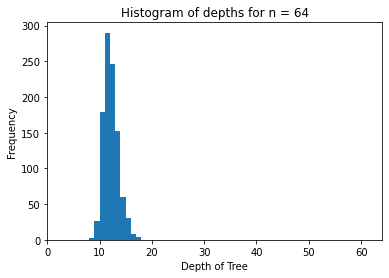

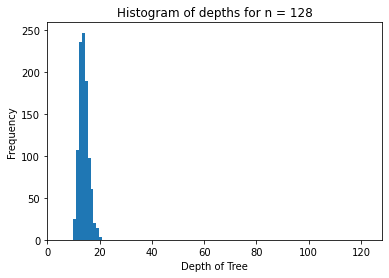

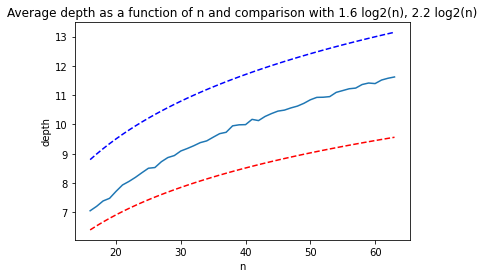

In [41]:
from matplotlib import pyplot as plt
import math

(avg64, lst_of_results_64) = run_multiple_trials(64, 1000)
plt.hist(lst_of_results_64)
plt.xlim(0,64)
plt.xlabel('Depth of Tree')
plt.ylabel('Frequency')
plt.title('Histogram of depths for n = 64')
print(f'Average depth for 64 = {avg64}')
assert avg64 <= 12 and avg64 >= 8

plt.figure()
(avg128, lst_of_results_128) = run_multiple_trials(128, 1000)
print(f'Average depth for 128 = {avg128}')
assert avg128 <= 16 and avg128 >= 12

plt.hist(lst_of_results_128)
plt.xlim(0,128)
plt.xlabel('Depth of Tree')
plt.ylabel('Frequency')
plt.title('Histogram of depths for n = 128')

nmin=16
nmax=64
lst_of_average_depths = [ run_multiple_trials(j,1000)[0] for j in range(nmin,nmax)]
plt.figure()
l1 = plt.plot(range(nmin,nmax), lst_of_average_depths,label='Avg. Depth')
plt.xlabel('n')
plt.ylabel('depth')
l2 = plt.plot(range(nmin,nmax), [1.6* math.log(j)/math.log(2) for j in range(nmin,nmax)],'--r',label='1.6log2(n)')
l3 = plt.plot(range(nmin,nmax), [2.2* math.log(j)/math.log(2) for j in range(nmin,nmax)],'--b',label='2.2log2(n)')
plt.title('Average depth as a function of n and comparison with 1.6 log2(n), 2.2 log2(n)')
print('-- Passed all tests --')

### This shows that the height of a randomly generated BST is concentrated between 1.8lg(n) and 2.2lg(n).